<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [4]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2024-12-11 23:04:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: 'survey-data.sqlite'

     0K .......... .......... .......... .......... ..........  0%  990K 3m29s
    50K .......... .......... .......... .......... ..........  0% 1.68M 2m44s
   100K .......... .......... .......... .......... ..........  0% 3.06M 2m11s
   150K .......... .......... .......... .......... ..........  0% 5.58M 1m48s
   200K .......... .......... .......... .......... ..........  0%  994K 2m7s
   250K ......

#### Install the required libraries and import them


In [5]:
!pip install pandas

In [6]:
!pip install matplotlib

In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [8]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [9]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [10]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [11]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


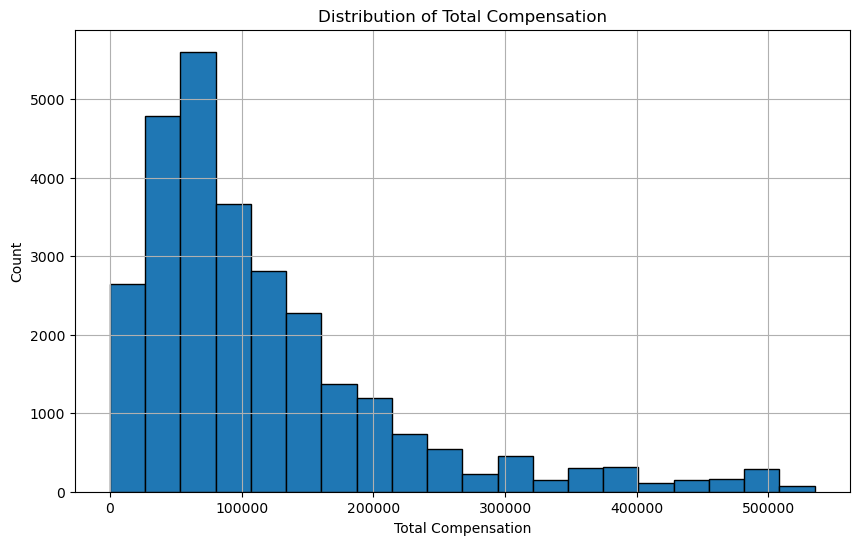

In [12]:
## Write your code here
QUERY = "SELECT CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

#Remove outliner of CompTotal
# 1. Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)

# 2. Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# 3. Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. Remove outliners
df_no_outliers = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

plt.figure(figsize=(10, 6))
plt.hist(df_no_outliers['CompTotal'], bins=20, edgecolor='k')
plt.xlabel('Total Compensation')
plt.ylabel('Count')
plt.title('Distribution of Total Compensation')
plt.grid(True)
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


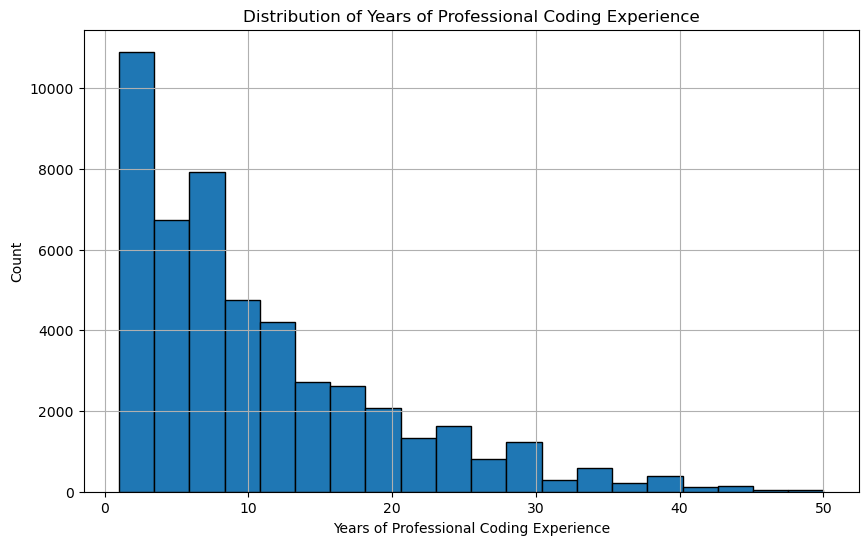

In [13]:
## Write your code here
QUERY = "SELECT YearsCodePro FROM main"
df = pd.read_sql_query(QUERY, conn)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['YearsCodePro'].dropna(inplace=True)
plt.figure(figsize=(10, 6))
plt.hist(df['YearsCodePro'], bins=20, edgecolor='k')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Count')
plt.title('Distribution of Years of Professional Coding Experience')
plt.grid(True)

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


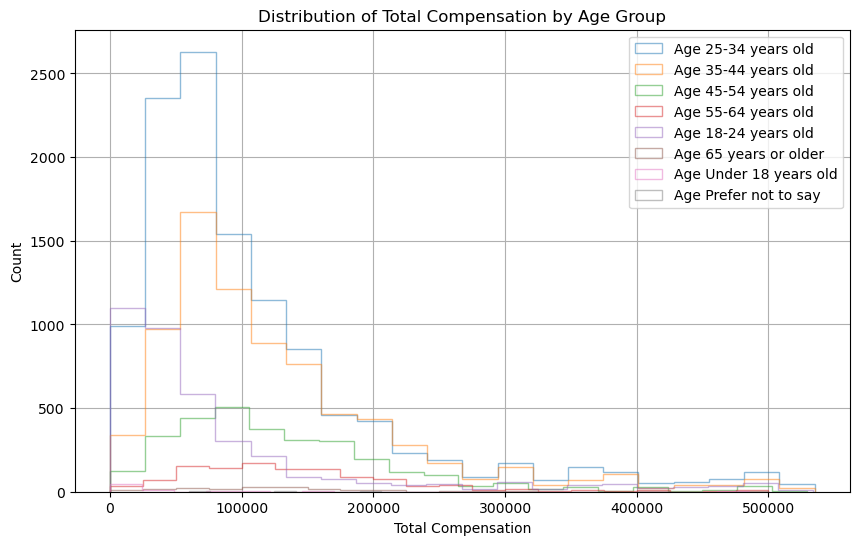

In [14]:
## Write your code here
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
#Remove outliner of CompTotal
# 1. Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)

# 2. Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# 3. Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. Remove outliners
df = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

plt.figure(figsize=(10, 6))
for age in df['Age'].unique():
    age_data = df[df['Age'] == age]
    plt.hist(age_data['CompTotal'], bins=20, alpha=0.5, histtype ='step', label=f'Age {age}')
plt.xlabel('Total Compensation')
plt.ylabel('Count')
plt.title('Distribution of Total Compensation by Age Group')
plt.legend()
plt.grid(True)
plt.show()



**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


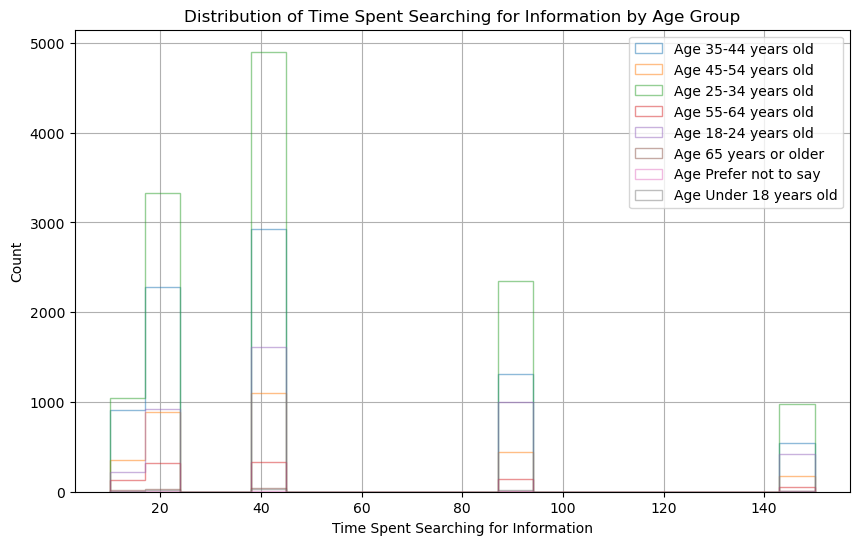

In [16]:
## Write your code here
QUERY = """
SELECT Age, TimeSearching
FROM main
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df['TimeSearching'].value_counts()
 # Create a time mapping
time_mapping = {
    'Less than 15 minutes a day' : 10,
    '15-30 minutes a day': 20,
    '30-60 minutes a day': 40,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}
df['TimeSearching'] = df['TimeSearching'].map(time_mapping)
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')
plt.figure(figsize=(10, 6))
for age in df['Age'].unique():
    age_data = df[df['Age'] == age]
    plt.hist(age_data['TimeSearching'], bins=20, alpha=0.5, histtype ='step', label=f'Age {age}')
plt.xlabel('Time Spent Searching for Information')
plt.ylabel('Count')
plt.title('Distribution of Time Spent Searching for Information by Age Group')
plt.legend()
plt.grid(True)
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


Text(0.5, 1.0, 'Top 5 Most Desired Databases')

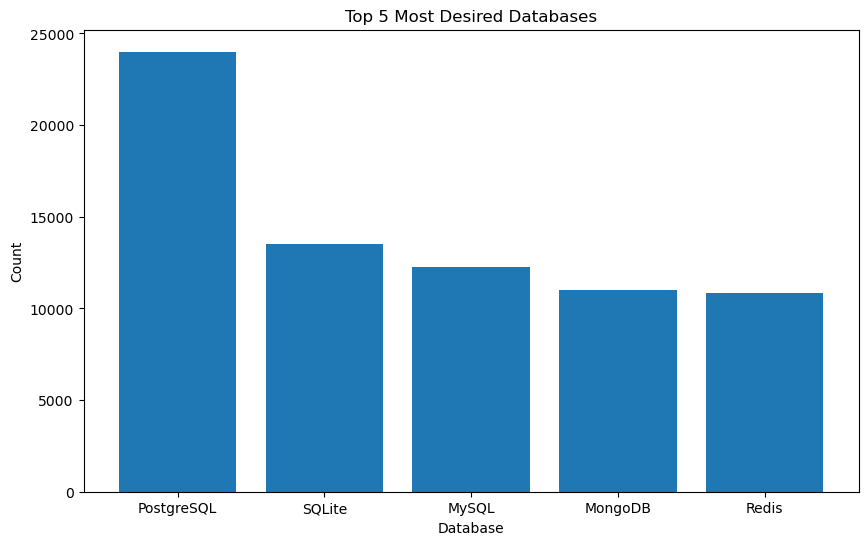

In [18]:
## Write your code here
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.split(';')
df = df.explode('DatabaseWantToWorkWith')
df2=df['DatabaseWantToWorkWith'].value_counts().head(5)
plt.figure(figsize=(10, 6))
plt.bar(df2.index, df2.values)
plt.xlabel('Database')
plt.ylabel('Count')
plt.title('Top 5 Most Desired Databases')


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


Text(0.5, 1.0, 'Distribution of Preferred Work Locations')

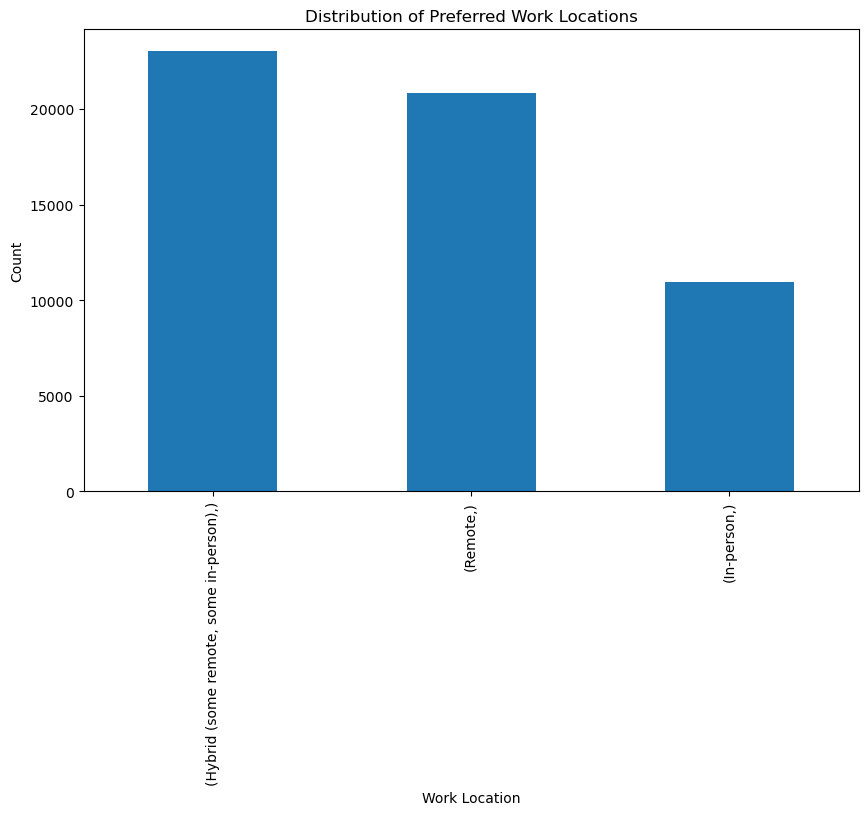

In [25]:
## Write your code here
QUERY = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df2=df.value_counts()
plt.figure(figsize=(10, 6))
df2.plot(kind='bar')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.title('Distribution of Preferred Work Locations')


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


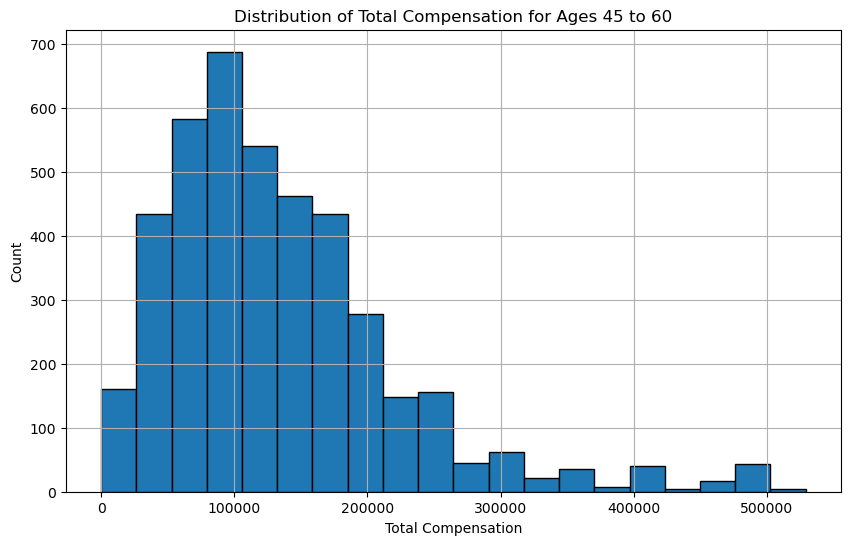

In [32]:
## Write your code here
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

#Remove outliner of CompTotal
# 1. Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)

# 2. Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# 3. Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. Remove outliners
df_no_outliers = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]


df_no_outliers = df_no_outliers[(df_no_outliers['Age'] == '45-54 years old') | (df_no_outliers['Age'] == '55-64 years old')]
plt.figure(figsize=(10, 6))
plt.hist(df_no_outliers['CompTotal'], bins=20, edgecolor='k')
plt.xlabel('Total Compensation')
plt.ylabel('Count')
plt.title('Distribution of Total Compensation for Ages 45 to 60')
plt.grid(True)
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


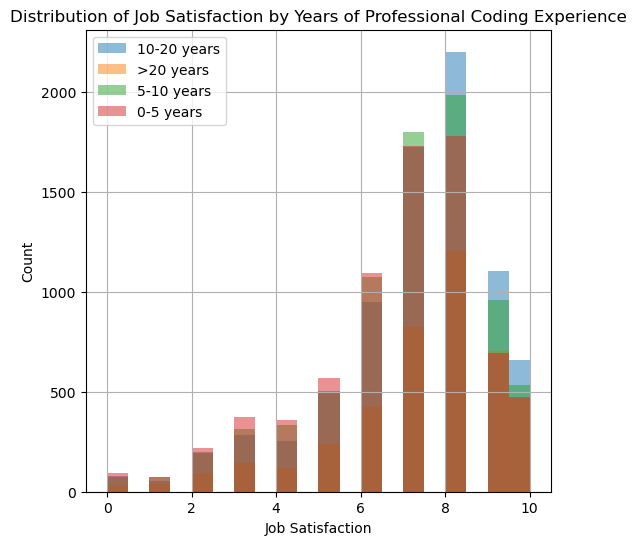

In [34]:
## Write your code here
QUERY = """
SELECT YearsCodePro, JobSat
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df.dropna(inplace=True)

# Define bins and labels for experience ranges
bins = [0, 5, 10, 20, float('inf')]  # Bin edges
labels = ["0-5 years", "5-10 years", "10-20 years", ">20 years"]
# Replace with experience ranges
df['YearsCodePro'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

#plot the graph
plt.figure(figsize=(6, 6))
for experience in df['YearsCodePro'].unique():
    experience_data = df[df['YearsCodePro'] == experience]
    plt.hist(experience_data['JobSat'], bins=20, alpha=0.5, label=experience)
plt
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Job Satisfaction by Years of Professional Coding Experience')
plt.legend()
plt.grid(True)
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [36]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
